In [15]:
from random import seed
import matplotlib.pyplot as plt
from random import randrange
from csv import reader
from math import sqrt

def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        next(file)
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [16]:
def str_column_to_float(dataset,column):
    for row in dataset:
        row[column]=float(row[column].strip())

In [29]:
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy=list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    x_train = [row[0] for row in test]
    y_train = [row[1] for row in test]
    
    plt.scatter(x_train, y_train, color = 'red')
    plt.plot(x_train, predicted, color = 'yellow')
    plt.title('Prediksi siswa ikut ekstrakurikuler')
    plt.xlabel('Dari setiap angkatan')
    plt.ylabel('Jumlah siswa')
    plt.show()
    
    rmse = rmse_metric(actual, predicted)
    return rmse

In [30]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

In [31]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions


In [32]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean)/ variance(x,x_mean)
    b0 = y_mean - b1 * x_mean
    return[b0,b1]

In [33]:
def mean(values):
    return sum(values)/float(len(values))

In [34]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)* (y[i] - mean_y)
    return covar

In [35]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [36]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

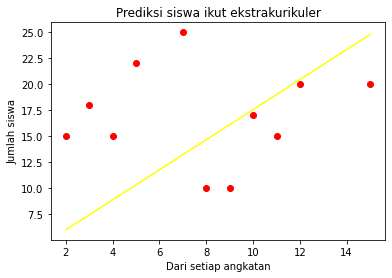

RMSE:7.416


In [39]:
filename = 'Siswa_Ekstra.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset,i)
    
split=0.2
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE:%.3f' % (rmse))